# San Francisco's Integrated Library System

Data Set source: https://www.kaggle.com/datasf/sf-library-usage-data

Context
San Francisco's Integrated Library System (ILS) is composed of bibliographic records including inventoried items, patron records, and circulation data. The data is used in the daily operation of the library, including circulation, online public catalog, cataloging, acquisitions, collection development, processing, and serials control. This dataset represents the usage of inventoried items by patrons (~420K records).

Description from the source: 

Content
The dataset includes approximately 420,000 records, with each record representing an anonymized library patron. Individual columns include statistics on the type code and age of the patron, the year the patron registered (only since 2003), and how heavily the patron has been utilizing the library system (in terms of number of checkouts) since first registering.

For more information on specific columns refer to the official data dictionary and the information in the Column Metadata on the /Data tab.

Acknowledgements
The data is provided by SF Public Library via the San Francisco Open Data Portal, under the PDDL 1.0 ODC Public Domain Dedication and Licence (PDDL).

Inspiration
What attributes are most associated with library activity (# of checkouts, # of renewals)?
Can you group the data into type of patrons? What classifiers would you use to predict patron type?


In [51]:
#import all the necessary packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objs as go
from texttable import Texttable
import plotly.plotly as py

In [52]:
data = pd.read_csv("Library_Usage.csv")  #read the csv data and store in the data variable as a data frame

## Understanding the data in hand:

- Analize the statastical importance of each feature of the data
- What is a dataset?
- Rows and columns
- Data-point
- Feature/variable

In [53]:
# prints column-names or feature-names
data.columns 

Index(['Patron Type Code', 'Patron Type Definition', 'Total Checkouts',
       'Total Renewals', 'Age Range', 'Home Library Code',
       'Home Library Definition', 'Circulation Active Month',
       'Circulation Active Year', 'Notice Preference Code',
       'Notice Preference Definition', 'Provided Email Address',
       'Year Patron Registered', 'Outside of County', 'Supervisor District'],
      dtype='object')

In [54]:
data.rename(columns={'Patron Type Code':'PatronTypeCode', 'Patron Type Definition':'PatronTypeDefinition',
    'Total Checkouts':'TotalCheckouts', 'Total Renewals':'TotalRenewals', 'Age Range':'AgeRange', 'Home Library Code':'HomeLibraryCode',
    'Home Library Definition':'HomeLibraryDefinition', 'Circulation Active Month':'CirculationActiveMonth',
    'Circulation Active Year':'CirculationActiveYear', 'Notice Preference Code':'NoticePreferenceCode',
    'Notice Preference Definition':'NoticePreferenceDefinition', 'Provided Email Address':'ProvidedEmailAddress',
    'Year Patron Registered':'YearPatronRegistered', 'Outside of County':'OutsideOfCounty', 'Supervisor District':'SupervisorDistrict'}
          , inplace=True)

#renaming the data frame columns personal preference

In [55]:
print ('Number of data points : ', data.shape[0])
print('Number of features/variables:', data.shape[1])
data.head() # prints the top rows in the table.

Number of data points :  423448
Number of features/variables: 15


,PatronTypeCode,PatronTypeDefinition,TotalCheckouts,TotalRenewals,AgeRange,HomeLibraryCode,HomeLibraryDefinition,CirculationActiveMonth,CirculationActiveYear,NoticePreferenceCode,NoticePreferenceDefinition,ProvidedEmailAddress,YearPatronRegistered,OutsideOfCounty,SupervisorDistrict
0,3,SENIOR,28,13,65 to 74 years,X,Main Library,November,2012,z,email,True,2003,True,NaN
1,0,ADULT,21,10,55 to 59 years,X,Main Library,October,2015,z,email,True,2003,False,NaN
2,0,ADULT,275,559,60 to 64 years,X,Main Library,January,2015,z,email,True,2003,True,NaN
3,0,ADULT,73,38,45 to 54 years,M8,Mission Bay,February,2016,z,email,True,2003,False,NaN
4,0,ADULT,182,90,45 to 54 years,X,Main Library,July,2016,z,email,True,2003,False,NaN


In [56]:
#Stats for all features in the data 
descriptionTable = Texttable()
descriptionTable.add_rows([['data description table', '-','--'],\
            [data['PatronTypeCode'].describe(), data['PatronTypeDefinition'].describe(), data['AgeRange'].describe()],\
            [data['TotalCheckouts'].describe(), data['TotalRenewals'].describe(), data['HomeLibraryCode'].describe()],\
            [data['CirculationActiveMonth'].describe(), data['CirculationActiveYear'].describe(), data['YearPatronRegistered'].describe()],\
            [data['NoticePreferenceDefinition'].describe(), data['NoticePreferenceCode'].describe(), data['ProvidedEmailAddress'].describe()],\
            [data['OutsideOfCounty'].describe(), data['SupervisorDistrict'].describe(),data.shape[0]]])
print(descriptionTable.draw())

+--------------------------+-------------------------+-------------------------+
|  data description table  |            -            |           --            |
+==========================+=========================+=========================+
| count    423448.000000   | count     423448        | count                   |
| mean          1.036765   | unique        18        | 423233                  |
| std           4.188198   | top        ADULT        | unique                  |
| min           0.000000   | freq      272251        | 10                      |
| 25%           0.000000   | Name:                   | top       25 to 34      |
| 50%           0.000000   | PatronTypeDefinition,   | years                   |
| 75%           1.000000   | dtype: object           | freq                    |
| max         104.000000   |                         | 91083                   |
| Name: PatronTypeCode,    |                         | Name: AgeRange, dtype:  |
| dtype: float64           |

### Observations

- Number of data points :  423448
- The CirculationActiveMonth are 13 unique values but only 12 months exist in real world.

## Data Cleaning

In [57]:
data['CirculationActiveMonth'].unique()

array(['November', 'October', 'January', 'February', 'July', 'December',
       'September', 'May', 'August', 'March', 'June', 'April', 'None'], dtype=object)

In [58]:
CirculationActiveMonthNoneData = data.loc[data['CirculationActiveMonth'] == 'None' ]
print(CirculationActiveMonthNoneData['CirculationActiveYear'].unique())
CirculationActiveMonthNoneData.head()

['None']


,PatronTypeCode,PatronTypeDefinition,TotalCheckouts,TotalRenewals,AgeRange,HomeLibraryCode,HomeLibraryDefinition,CirculationActiveMonth,CirculationActiveYear,NoticePreferenceCode,NoticePreferenceDefinition,ProvidedEmailAddress,YearPatronRegistered,OutsideOfCounty,SupervisorDistrict
291,3,SENIOR,0,0,65 to 74 years,X,Main Library,None,None,z,email,True,2016,True,NaN
482,0,ADULT,0,0,25 to 34 years,X,Main Library,None,None,z,email,True,2016,True,NaN
634,0,ADULT,8,0,35 to 44 years,C2,Chinatown,None,None,p,phone,False,2003,False,3.0
798,0,ADULT,0,0,20 to 24 years,R3,Richmond,None,None,z,email,True,2016,True,NaN
847,16,DIGITAL ACCESS CARD,0,0,20 to 24 years,O2,Ocean View,None,None,z,email,True,2014,False,11.0


The extra month is 'None' and there are 67904 records and for the months where the value is ' None' the activation year is also ' None' for data simplification can ignore these records.

In [59]:
print(data.shape[0])
data = data.loc[~(data['CirculationActiveMonth'] == 'None')]
print('Number of data points after removing CirculationActiveMonth = "None" :', data.shape[0])

423448
Number of data points after removing CirculationActiveMonth = "None" : 355544


As the following can be converted into a dictionary and removing the respective definition columns will reduce the data size. Removing the following columns 
- PatronTypeDefinition
- NoticePreferenceDefinition
- HomeLibraryDefinition

After creating the following dictionaries

- patronTypeDict
- noticePreferenceDict
- homeLibraryDict

And reference the dictionaries with the following codes

- PatronTypeCode
- NoticePreferenceCode
- HomeLibraryCode
respectively.

In [60]:
patronTypeDict = {}
for patronTypeDefinition in data['PatronTypeDefinition'].unique():
    patronTypeCode = data.loc[data['PatronTypeDefinition'] == patronTypeDefinition ] ['PatronTypeCode'].value_counts().index[0]
    patronTypeDict[patronTypeCode] = []
    patronTypeDict[patronTypeCode].append(patronTypeDefinition )
print(patronTypeDict)

{3: ['SENIOR'], 0: ['ADULT'], 16: ['DIGITAL ACCESS CARD'], 55: ['RETIRED STAFF'], 5: ['STAFF'], 9: ['SPECIAL'], 4: ['WELCOME'], 15: ['TEACHER CARD'], 100: ['AT USER ADULT'], 10: ['VISITOR'], 12: ['BOOKS BY MAIL'], 1: ['JUVENILE'], 8: ['FRIENDS FOR LIFE'], 103: ['AT USER SENIOR'], 104: ['AT USER WELCOME'], 102: ['AT USER TEEN'], 2: ['YOUNG ADULT'], 101: ['AT USER JUVENILE']}


In [61]:
noticePreferenceDict = {}
for noticePreferenceDefinition in data['NoticePreferenceDefinition'].unique():
    noticePreferenceCode = data.loc[data['NoticePreferenceDefinition'] == noticePreferenceDefinition ] ['NoticePreferenceCode'].value_counts().index[0]
    noticePreferenceDict[noticePreferenceCode] = []
    noticePreferenceDict[noticePreferenceCode].append(noticePreferenceDefinition )
print(noticePreferenceDict)

{'z': ['email'], 'p': ['phone'], 'a': ['print'], '-': ['none']}


In [62]:
homeLibraryDict = {}
for homeLibraryDefinition in data['HomeLibraryDefinition'].unique():
    homeLibraryCode = data.loc[data['HomeLibraryDefinition'] == homeLibraryDefinition ] ['HomeLibraryCode'].value_counts().index[0]
    homeLibraryDict[homeLibraryCode] = []
    homeLibraryDict[homeLibraryCode].append(homeLibraryDefinition)
print(homeLibraryDict)

{'X': ['Main Library'], 'M8': ['Mission Bay'], 'P7': ['Potrero'], 'S7': ['Sunset'], 'M4': ['Merced'], 'N4': ['Noe Valley/Sally Brunn'], 'E9': ['Excelsior'], 'C2': ['Chinatown'], 'R3': ['Richmond'], 'N6': ['North Beach'], 'P9': ['Presidio'], 'M6': ['Mission'], 'P1': ['Park'], 'M2': ['Marina'], 'P3': ['Parkside'], 'E7': ['Eureka Valley/Harvey Milk Memorial'], 'A5': ['Anza'], 'W2': ['West Portal'], 'I5': ['Ingleside'], 'B4': ['Bernal Heights'], 'P5': ['Portola'], 'O7': ['Ortega'], 'W4': ['Western Addition'], 'YB': ['Unknown'], 'O2': ['Ocean View'], 'G4': ['Glen Park'], 'V3': ['Visitacion Valley'], 'B2': ['Bayview/Linda Brooks-Burton'], 'G6': ['Golden Gate Valley'], 'YLW': ['Library on Wheels'], 'YJJ': ["Children's Bookmobile"], 'YB2': ['Branch Bookmobile (West Portal)'], 'YB1': ['Branch Bookmobile (Excelsior)'], 'YB3': ['Branch Bookmobile (Marina)'], 'YB4': ['Branch Bookmobile (Sunset)']}


In [63]:
data.pop('PatronTypeDefinition')
data.pop('NoticePreferenceDefinition')
data.pop('HomeLibraryDefinition')
print ("patronTypeDict size -", len(patronTypeDict))
print ("noticePreferenceDict size -", len(noticePreferenceDict))
print ("homeLibraryDict size -", len(homeLibraryDict))

patronTypeDict size - 18
noticePreferenceDict size - 4
homeLibraryDict size - 35


In [64]:
data.head(3)

,PatronTypeCode,TotalCheckouts,TotalRenewals,AgeRange,HomeLibraryCode,CirculationActiveMonth,CirculationActiveYear,NoticePreferenceCode,ProvidedEmailAddress,YearPatronRegistered,OutsideOfCounty,SupervisorDistrict
0,3,28,13,65 to 74 years,X,November,2012,z,True,2003,True,NaN
1,0,21,10,55 to 59 years,X,October,2015,z,True,2003,False,NaN
2,0,275,559,60 to 64 years,X,January,2015,z,True,2003,True,NaN


## Finding patterns in the data

Creating a correlation matrix for all the features will help in understanding the data. And the dependencies within the data.

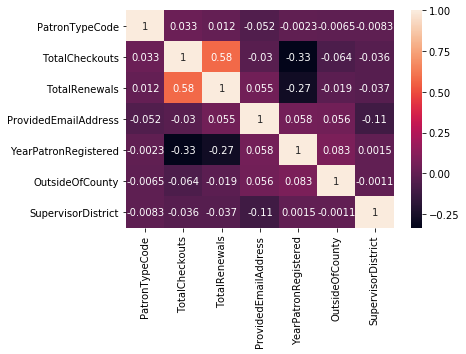

In [65]:
corr = data.corr()
sns.heatmap(corr, annot=True)
plt.show()

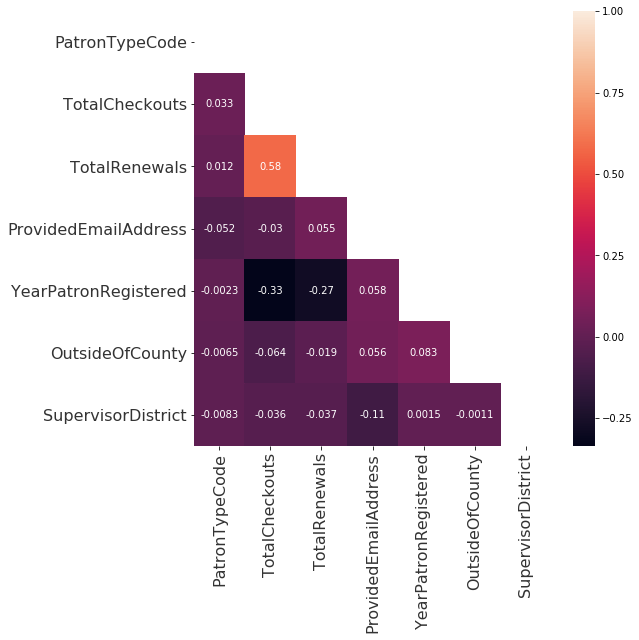

In [66]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(8,8))
sns.heatmap(corr, mask=mask, annot=True)
plt.xticks(fontsize = 16, alpha=0.8 )
plt.yticks(fontsize = 16, alpha=0.8)
plt.show()

### Observations

- Total renewals and total checkouts are in maximum correlation.
- Total checkouts and year patron registered are in negative correlation, ie., as the years are increasing the no of checkouts are decreasing and that kinda shows the reduce in the library customers.

As observed the years are inversely proportional to no of checkouts. So we can plot the graph to observe the relation.

In [32]:
years = []
totalCheckoutsSum = []
for year in data['YearPatronRegistered'].unique():
    years.append(year)
    totalCheckoutsSum.append(data.loc[data['YearPatronRegistered'] == year ]['TotalCheckouts'].sum())

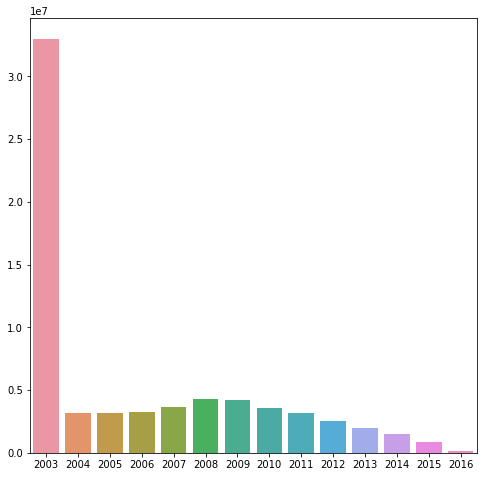

In [33]:
plt.figure(figsize=(8,8))
sns.barplot(x= years,  y = totalCheckoutsSum)
plt.show()

In [40]:
years = []
yearsRegCount = []
for year in data['YearPatronRegistered'].unique():
    years.append(year)
    yearsRegCount.append(data.loc[data['YearPatronRegistered'] == year ].shape[0])

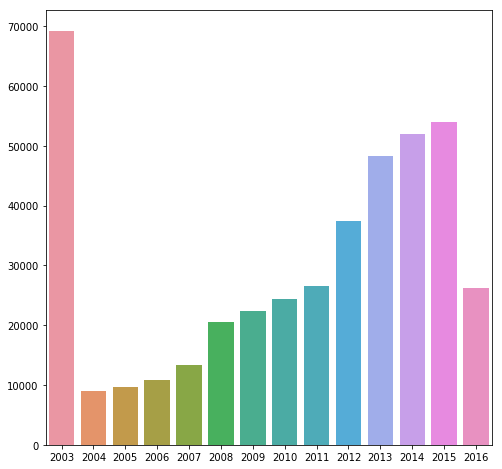

In [41]:
plt.figure(figsize=(8,8))
sns.barplot(x= years,  y = yearsRegCount)
plt.show()

As we can observe from the above 2 graphs 
- years vs TotalCheckouts
- years vs YearPatronRegistered

Even though as the years increases the YearPatronRegistered are tending to increase the TotalCheckouts are reducing. this may be the result of the users that are just registered but not checking out the books.

# users not having chekouts
# and users with respect to age 

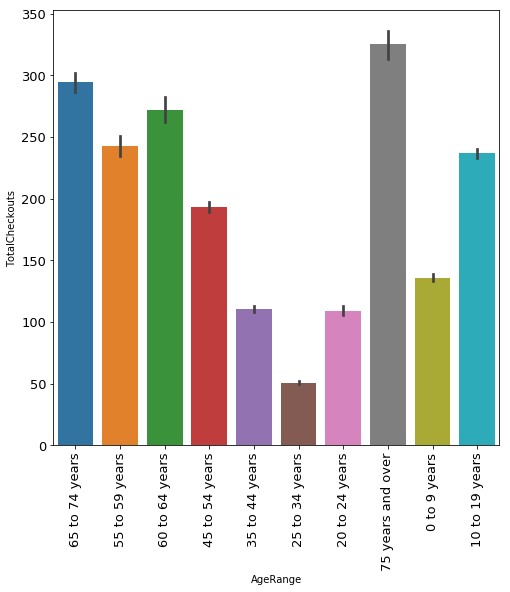

In [42]:
plt.figure(figsize=(8,8))
sns.barplot(x="AgeRange", y="TotalCheckouts", data=data)
plt.xticks(fontsize = 13, rotation = 90 )
plt.yticks(fontsize = 13)
plt.show()

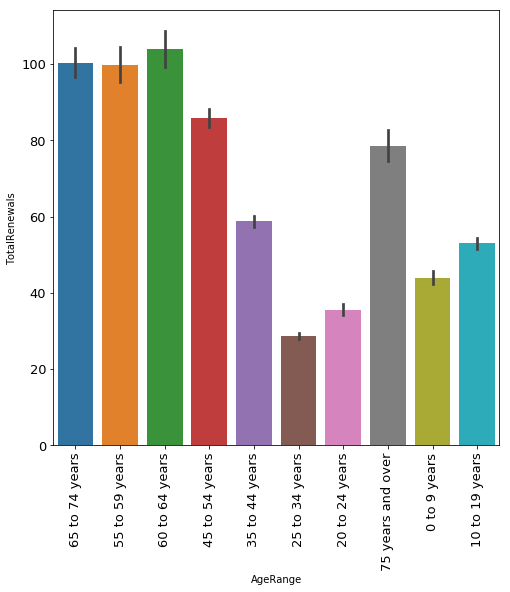

In [43]:
plt.figure(figsize=(8,8))
sns.barplot(x="AgeRange", y="TotalRenewals", data=data)
plt.xticks(fontsize = 13, rotation = 90 )
plt.yticks(fontsize = 13)
plt.show()

In [44]:
HomeLibraryCodes = []
HomeLibraryCodeSizes = []
for HomeLibraryCode in data['HomeLibraryCode'].unique():
    HomeLibraryCodes.append(homeLibraryDict.get(HomeLibraryCode))
    HomeLibraryCodeSizes.append(data.loc[data['HomeLibraryCode'] == HomeLibraryCode ].shape[0])

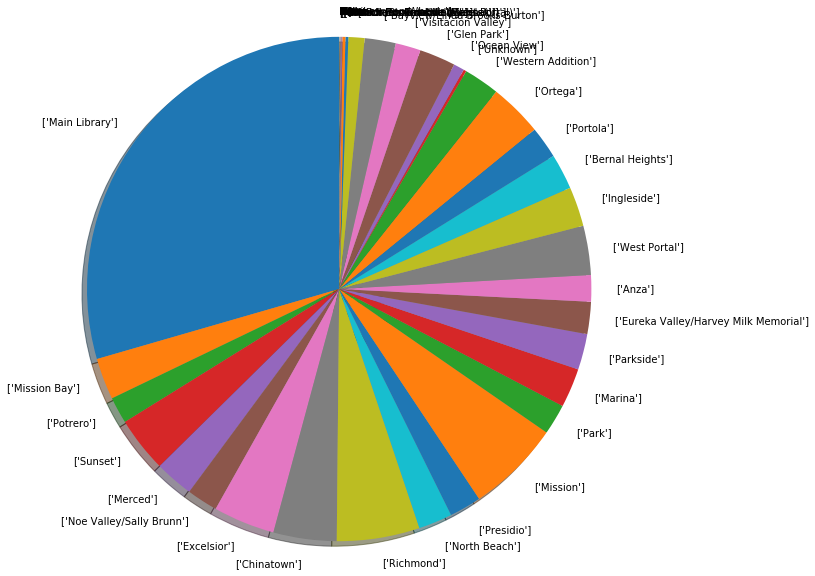

In [45]:
fig1, ax1 = plt.subplots()
ax1.pie(HomeLibraryCodeSizes, labels=HomeLibraryCodes, shadow=True, startangle=90)
ax1.axis('equal')  
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] =10
plt.show()